# Assignment 3.1
Name:  Isaack Karanja
Date: Jan, 26, 2023

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit the assignment as a PDF file. Always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

In [1]:
import numpy as np
import statistics # use for mean and standard deviation functions
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd

## Problem 3.2.

In an exit poll of 1648 voters in the 2020 Senatorial election in Arizona, 51.5% said they voted
for Mark Kelly and 48.5% said they voted for Martha McSally

a) Suppose that actually 50% of the population voted for Kelly. If this exit poll had the
properties of a simple random sample, find the standard error of the sample proportion
voting for him.

b) Under the 50% presumption, are the results of the exit poll surprising? Why? Would you
be willing to predict the election outcome? Explain by (i) conducting a simulation; (ii)
using the value found in (a) for the standard error.

`(a) Your answer goes here`

Asuming that this is a binomaal distribution

Independent trials $n = 1648$

Standard Error $\text{SE}(\hat{p})$

$\text{SE}(\hat{p}) = \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$


where $\hat{p}$ is the sample proportion and $n$ is the sample size. Substituting in the values given in the problem, we have:

$\text{SE}(\hat{p}) = \sqrt{\frac{0.515(1-0.515)}{1648}} = 0.01$



In [2]:
round(((0.515*(1-0.515))/1648)**(.5),2)

0.01

`(b) Your answer goes here`

0.5 Sampling Mean
0.01 Standard deviationn of the results/Standard Error


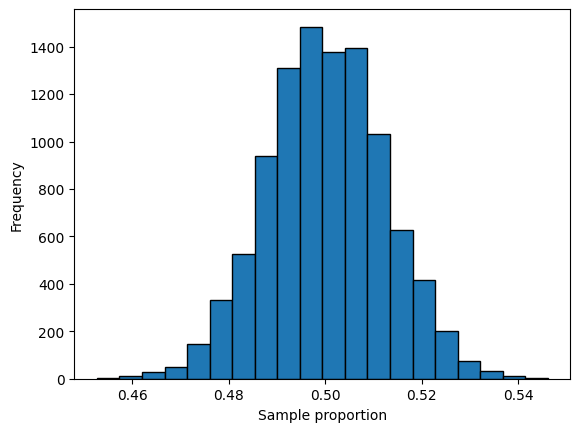

In [3]:
## i) Simulation using binomial experiment 

n = 1648 #sample size
p = 0.50 
results = np.random.binomial(n, p, 10000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/Standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()

In [4]:
##Probability of of 51.5% of actual vote 
zscore = round((0.515 - 0.50)/0.01,2)

print(zscore, "zscore")
      
#Probability of getting 51.5% votes is 1  - Probability_lookup_table(zscore) 
print(round((1 - .9332)*100,2), "% probability of getting 51.5% votes from the zscore lookup table")

1.5 zscore
6.68 % probability of getting 51.5% votes from the zscore lookup table


The results of the exit poll are surprising. If actually 50% of the population voted for Kelly, then the probability of getting 51.5% in an exit poll of 1648 people is only 6.68%. This means that it is very unlikely that the exit poll does not accurately represent how Arizonans actually voted, this is because random sampling of a pouplation of voters do not address situations such as early voting and mail ballots. I would not be willing to predict the outcome of the election based on polling results.

In [5]:
# ii) Using the results found in the standard error 

When you consider the standard error, the results of the exit poll are surprising because they differ from the actual outcome by more than the standard error $1\%$. This means that the poll is not an accurate representation of the population and should not be used to predict the election outcome.

## Problem 3.3.

The 49 students in a class at the University of Florida made blinded evaluations of pairs of
cola drinks. For the 49 comparisons of Coke and Pepsi, Coke was preferred 29 times. In the
population that this sample represents, is this strong evidence that a majority prefers Coke?
Use a simulation of a sampling distribution to answer.

`Your answer goes here`

0.5 Sampling Mean
0.07 Standard deviationn of the results/standard Error


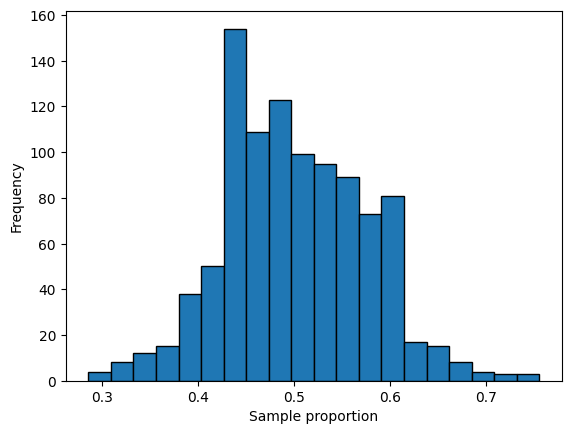

In [6]:
### The following is a sampling distribution of the sample proportions of 29 out of 49 people.
## i) Simulation using binomial experiment 

n = 49 
p = .50 
results = np.random.binomial(n, p, 1000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()


The distribution is centered at 0.59 and has a standard deviation of 0.07. 

Since the population proportion is 0.50, the z-score for the sample proportion of 29 out of 49 people is 1.18 $(0.5918 - 0.50)/0.0653 = 1.18)$. 

A z-score of 1.18 is not very extreme and therefore does not provide strong evidence that a majority prefers Coke over Pepsi in the population that this sample represents. 

## Problem 3.5.

The example in Section 3.1.4 simulated sampling distributions of the sample mean to determine how precise $\bar{Y}$ for $n=25$ may estimate a population mean $\mu.$

a) Find the theoretical standard error of $\bar{Y}$ for the scenario values of $\sigma = 5$ and 8. How do they compare to the standard deviations of the 100,000 sample means in the simulations?

`Your answer goes here`

In [7]:
# Randomly generate 100000 random samples of size n = 25 from a gamma distribution and find the std deviation (standard error) of each simulation
n = 25 #sample size
sim = 100000#number of simulations
def gamma_distribution(shape, scale, n, sim):
    results = np.random.gamma(shape, scale, n*sim)
    results = np.split(results, sim)
    results = np.mean(results, axis=1)
    zscore = stats.zscore(results)
    #print(round(statistics.mean(results),2), "Sampling Mean")

    plt.hist(results,  edgecolor='k') # histogram
    plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
    plt.show()
    print(round(statistics.stdev(results),2), "Standard deviationn of the results/standard Error")
    return zscore
    

Independent trials $n = 25$

Standard deviation of the population is $\sigma = \{5,8\}$

$\sigma_\bar{Y}=\frac{\sigma}{\sqrt{n}}$

Case1: $\sigma_\bar{Y}$ for  $\{n, \sigma\} =\{ 25, 5\}$

$\sigma_\bar{Y}=\frac{5}{\sqrt{25}} = 1$


Case2: $\sigma_\bar{Y}$ for  $\{n, \sigma\} =\{ 25, 8\}$

$\sigma_\bar{Y}=\frac{8}{\sqrt{25}} = 1.6$

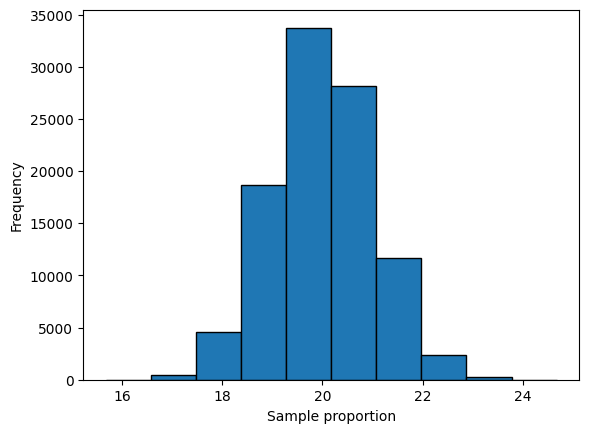

1.0 Standard deviationn of the results/standard Error


In [8]:
#Case 1, simulated values match up with the calculated results
shape1, scale1 = 16, 1.25 
zscore1 = gamma_distribution(shape1, scale1, n, sim)

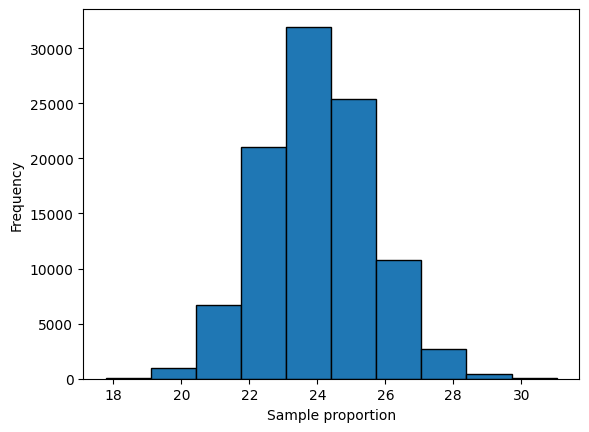

1.6 Standard deviationn of the results/standard Error


In [9]:
#Case 2, simulated values match up with the calculated results
shape2, scale2 = 9, 8/3 
zscore2 = gamma_distribution(shape2, scale2, n, sim)

b) In the first scenario, we chose $\sigma = 5$ under the belief that if $\mu = 20$, about 2/3 of the sample values would fall between 15 and 25. For the gamma distribution with $(\mu, \sigma) = (20,5),$ show that the actual probability between 15 and 25 is 0.688.

$z = \frac{x - \mu}{\sigma}$

`Your answer goes here`

In [10]:
## Lower bound 
x_low = 15
x_up = 25
u = 20 
a = 5

zscore_15 = (x_low-u)/a
low_bound =  round(stats.norm.cdf(zscore_15),4)
print(low_bound, "lower bound probability")

## Uper bound 
zscore_25 = (x_up-u)/a
upper_bound = round(stats.norm.cdf(zscore_25),4)
print(upper_bound, "upper bound probability")


## Lower to upper bound 
round((upper_bound - low_bound),2)


0.1587 lower bound probability
0.8413 upper bound probability


0.68

## Problem 3.8.

Construct the sampling distribution of the sample proportion of heads, for flipping a balanced
coin (a) once; (b) twice; (c) three times; (d) four times. Describe how the shape changes
as the number of flips $n$ increases. What would happen if $n$ kept growing? Why?


`Your answer goes here`

0.5 Sampling Mean
0.5 Standard deviationn of the results/Standard Error


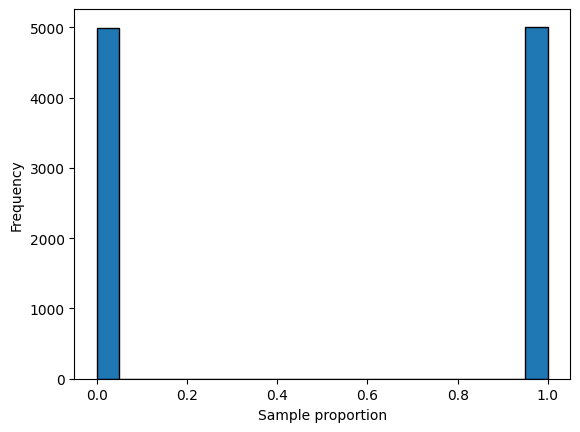

In [11]:
## i) Simulation using binomial experiment for n = 10000

n = 1 # flip once
p = 0.50 
results = np.random.binomial(n, p, 10000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/Standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()


0.5 Sampling Mean
0.35 Standard deviationn of the results/Standard Error


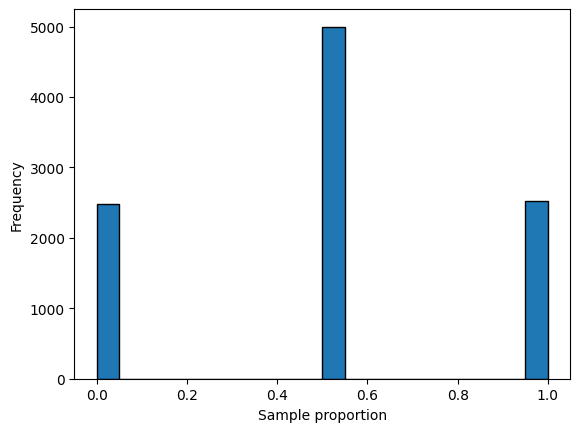

In [12]:
## i) Simulation using binomial experiment for n = 10000

n = 2 # flip twice
p = 0.50 
results = np.random.binomial(n, p, 10000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/Standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()


0.5 Sampling Mean
0.29 Standard deviationn of the results/Standard Error


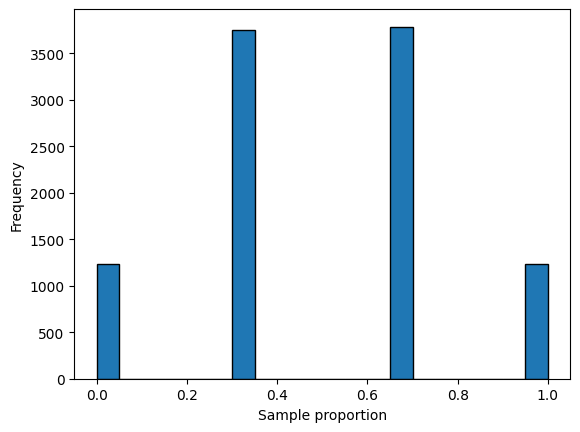

In [13]:
## i) Simulation using binomial experiment for n = 10000

n = 3 # flip three times
p = 0.50 
results = np.random.binomial(n, p, 10000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/Standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()


0.5 Sampling Mean
0.25 Standard deviationn of the results/Standard Error


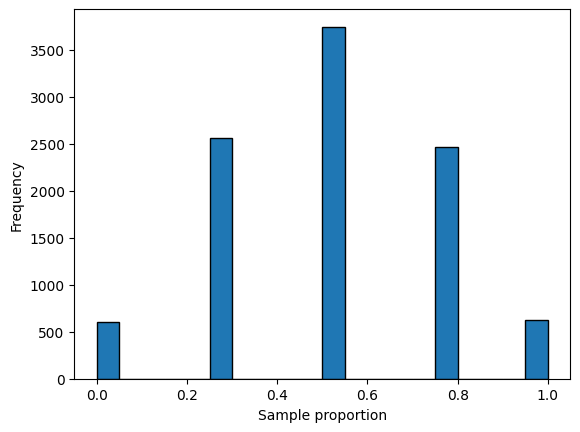

In [14]:
## i) Simulation using binomial experiment for n = 10000

n = 4 # flip four times
p = 0.50 
results = np.random.binomial(n, p, 10000)/n
print(round(statistics.mean(results),2), "Sampling Mean")
print(round(statistics.stdev(results),2), "Standard deviationn of the results/Standard Error")

plt.hist(results, bins=20, edgecolor='k') # histogram
plt.xlabel('Sample proportion'); plt.ylabel('Frequency')
plt.show()


***As demostrated in the histograms above,  you flip a balanced coin, once, the sampling distribution would be uniform. If you flip a balanced coin, twice, the sampling distribution would be bimodal. If you flip a balanced coin, three times, the sampling distribution would be trimodal. If you flip a balanced coin, four times, the sampling distribution would be quadrimodal.

The shape of the sampling distribution changes as the number of flips increases because the probability of getting a certain outcome changes with each flip. For example, the probability of getting two heads in a row is 1/4, but the probability of getting three heads in a row is 1/8. As the number of flips increases, the shape of the distribution becomes more and more peaked, until it approaches a normal distribution with a sampling mean of 1/2


## Problem 3.11.

Simulate taking a random sample of sinze $n$ from a Poisson distribution with $\mu = 5.$ Find $\bar{y}$ for $n=10, n = 1000, n = 100,000,$ and $n=10,000,000$ to illustrate the law of large numbers.

`Your answer goes here`

The law of large numbers is a theorem that states that, as the number of trials increases, the average of the results obtained from the trials will tend to converge to the mean value of the population.

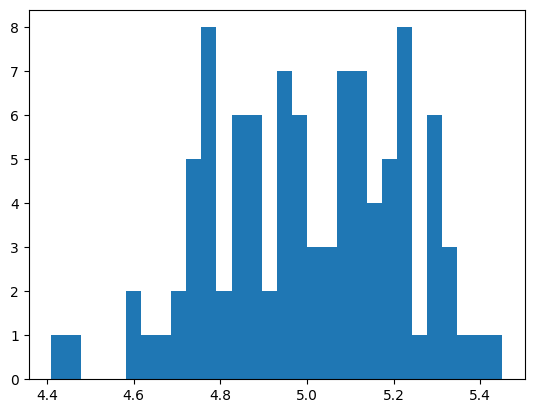

5.0 This is the sampling mean for 100 Trials


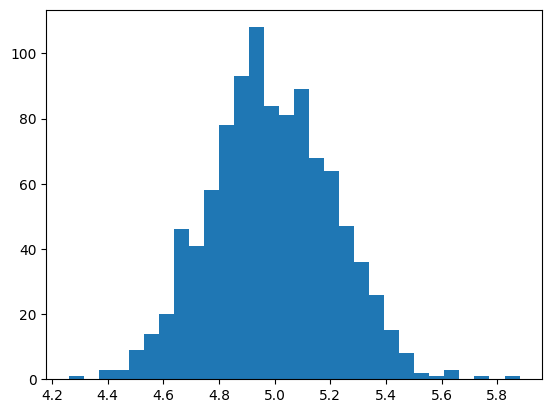

4.99 This is the sampling mean for 1000 Trials


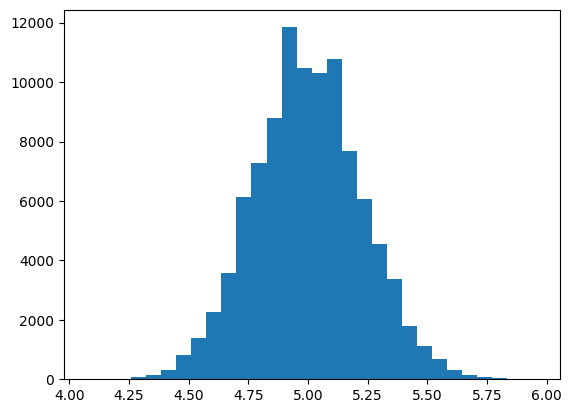

5.0 This is the sampling mean for 100000 Trials


In [15]:
# Let's define a function to generate our Poisson samples. This function will take in the size of our sample (n) = 10 and the mean of our Poisson distribution (mu) = 5
# It will return a list of n randomly generated values from a Poisson distribution with a mean of mu.

def generate_poisson_sample(mu, sample_size):
    return np.random.poisson(mu, sample_size)

#Now, let's use this function to generate 100 samples, each containing 10, 100, 100,000, 10,000,000 sample size. We'll use a mean of 5 the Poisson distribution.

def generate_samples(mu, sample_size, trials):
    samples = [generate_poisson_sample(mu, sample_size) for i in range(trials)]

    #Now, let's calculate the mean of each sample and plot it.
    sample_means = [np.mean(sample) for sample in samples]
    plt.hist(sample_means, bins=30)
    plt.show()
    mean_np = np.array(sample_means).mean()
    print(round(mean_np,2), "This is the sampling mean for", trials, "Trials")


#As we can see from the plot, as we take more and more samples, the mean of our samples approaches 5, which is the mean of our original Poisson distribution. 
#This is the law of large numbers at work!
mu = 5
sample_size = 100 # 
generate_samples(mu, 100, 100 ) #10 trials
generate_samples(mu, 100, 1000 ) #100 trials
generate_samples(mu, 100, 100000 ) #100000 trials


As we can see from the histograms,as we increase the sample size, the mean of our samples approaches 5, which is the mean of our original Poisson distribution. 

## Problem 3.12.

Simulate random sampling from a normal population distribution with several $n$ values to
illustrate the law of large numbers.

`Your answer goes here`

The law of large numbers is a mathematical theorem that states that, as the number of trials increases, the average of the results obtained from the trials converges to the expected value of the random variable.

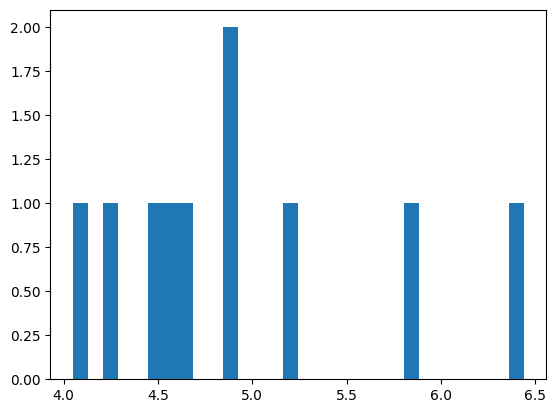

4.94 This is the sampling mean for 10 Trials


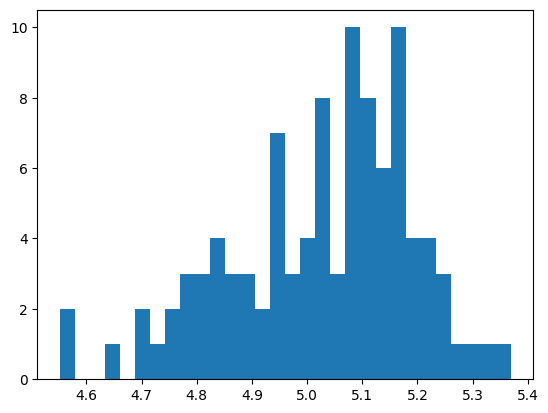

5.03 This is the sampling mean for 100 Trials


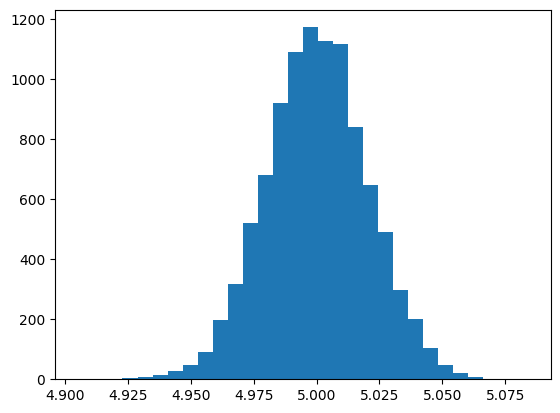

5.0 This is the sampling mean for 10000 Trials


In [16]:
# Let's define a function to generate our random sampling from a normal population distribution. 
# This function will take  (n) = 100 and the mean of our normal distribution (mu) = 5
# It will return a list of n randomly generated values from a normal distribution with a mean of mu.

def generate_normal_samples(mu, sigma, trials):
    return np.random.normal(mu, sigma, trials)


#Now, let's use this function to generate 100  samples, each containing 10, 100, 100,000, 10,000,000 sample size. We'll use a mean of 5 the Poisson distribution.

def generate_samples(mu, sigma, trials):
    samples = [generate_normal_samples(mu, sigma, trials) for i in range(trials)]
    #Now, let's calculate the mean of each sample and plot it.
    sample_means = [np.mean(sample) for sample in samples]
    plt.hist(sample_means, bins=30)
    plt.show()
    mean_np = np.array(sample_means).mean()
    print(round(mean_np,2), "This is the sampling mean for", trials, "Trials")


#As we can see from the plot, as we take more and more samples, the mean of our samples approaches 5, which is the mean of our original Poisson distribution. 
#This is the law of large numbers at work!
mu = 5
sigma = 2 # 100 values per sample
generate_samples(mu, sigma, 10) #10 trials
generate_samples(mu, sigma, 100) #100 trials
generate_samples(mu, sigma, 10000) #100000 trials

## Problem 3.13.

Simulate random sampling from a uniform population distribution with several $n$ values to
illustrate the Central Limit Theorem.

`Your answer goes here`

The Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true for sample sizes over 30.

This is the normal distribution for 10 sample size


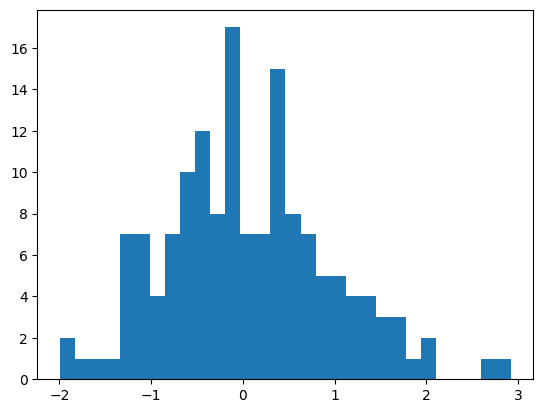

This is the normal distribution for 100 sample size


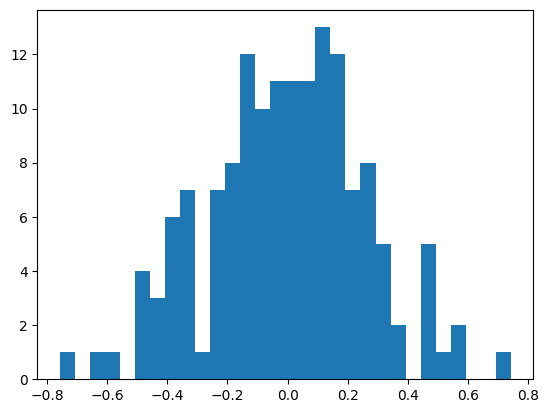

This is the normal distribution for 1000 sample size


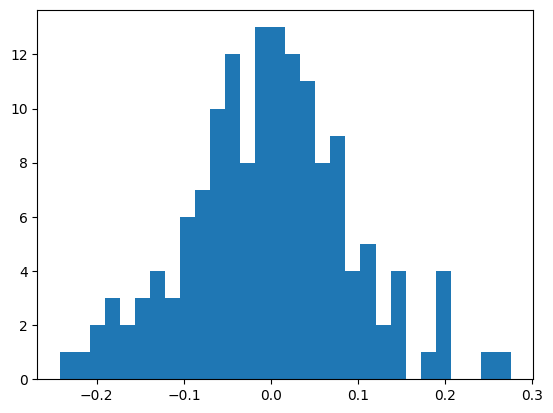

This is the normal distribution for 100000 sample size


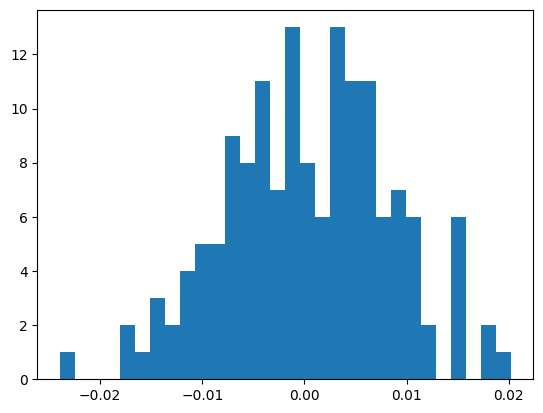

This is the normal distribution for 1000000 sample size


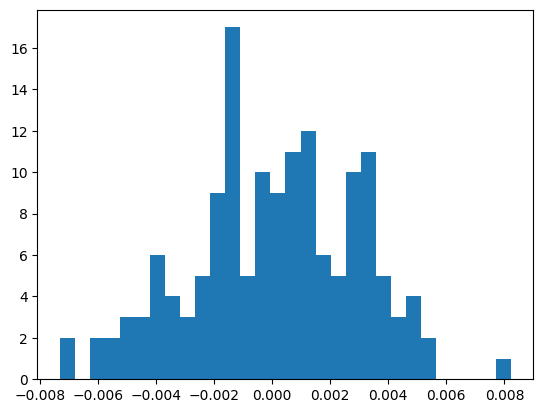

In [17]:
# Let's define a function to generate our random sampling from a normal population distribution. 
# This function will take  (n) = 100 and the mean of our normal distribution (mu) = 5
# It will return a list of n randomly generated values from a normal distribution with a mean of mu.

def generate_random_uniform_samples(low, high, sample_size):
    return np.random.uniform(low,high,sample_size)


#Now, let's use this function to generate 100  samples, each containing 10, 100, 100,000, 10,000,000 sample size. We'll use a mean of 5 the Poisson distribution.

def generate_samples(low, high, sample_size, trials):
    samples = [generate_random_uniform_samples(low, high, sample_size) for i in range(trials)]
    #Now, let's calculate the mean of each sample and plot it.
    sample_means = [np.mean(sample) for sample in samples]
    plt.hist(sample_means, bins=30)
    print("This is the normal distribution for", sample_size, "sample size")
    plt.show()


#As we can see from the plot, as we take more and more samples, the mean of our samples approaches 5, which is the mean of our original Poisson distribution. 
#This is the law of large numbers at work!
low = -5
high = 5 # 100 values per sample
trials = 150
generate_samples(low, high, 10, trials) #10 trials
generate_samples(low, high, 100, trials) #100 trials
generate_samples(low, high, 1000, trials) #100000 trials
generate_samples(low, high, 100000, trials) #100000 trials
generate_samples(low, high, 1000000, trials) #1000000 trials

## Problem 3.14.

On each bet in a sequence of bets, you win 1 dollar with probability 0.50 and lose 1 dollar (i.e., win negative 1 dollar) with probability 0.50. Let $Y$ denote the total of your winnings and losings after 100 bets. Giving your reasoning, state the approximate distribution of $Y.$ 

`Your answer goes here`

This is a binomal distribution, since we have only two possible outcomes, either success or failure with a probability of .50

$Y_i$ are independent binoal variables

$n = 100$ 
$\mu = 0.5$

$Y = \sum_{i=1}^{n}n_i, \pi$


## Problem 3.15.

According to a General Social Survey, in the United States the population distribution of $Y$ =
number of good friends (not including family members) has a mean of about 5.5 and a standard
deviation of about 3.9.

a) Is it plausible that this population distribution is normal? Explain.

`Your answer here`

Although possible, the question does not provide any evidence that the popuation is normally distribted.

b) If a new survey takes a simple random sample of 1000 people, describe the sampling
distribution of $\bar{Y}$ by giving its shape and approximate mean and standard error.

`Your answer here`

Mean

$\mu_\bar{y}=\mu=5.5$

Standard Deviation 
$\sigma_\bar{y}=\frac{\sigma}{\sqrt{n}}}=\frac{3.9}{\sqrt{1000}}=0.12$  

Sampling distribution is normally distributed 

c) Suppose that actually the mean of 5.5 and standard deviation of 3.9 are not population
values but are based on a sample of 1000 people. Treating results as a simple random
sample, give an interval of values within which you can be very sure that the population
mean falls. Explain your reasoning.

`Your answer here`

The pouplation mean should fall within two standard deviations of the sample popluation 

$\mu_\bar{y} + 2\times \sigma_\bar{y}$ = $5.5\pm0.12$ = $\{5.26,5.74\}$ 

## Problem 3.18.

Sunshine City, which attracts primarily retired people, has 90,000 residents with a mean age
of 72 years and a standard deviation of 12 years. The age distribution is skewed to the left. A
random sample of 100 residents of Sunshine City has $\bar{y} = 70$ and $s = 11.$

a)  Describe the center and spread of the (i) population distribution, (ii) sample data distribution. What shape does the sample data distribution probably have? Why?

`Your answer here`

i) 
- Mean/Center ->  72 years
- Spread/standard deiviation -> 12 years  
- Sample data distribution -> Skewed to the left

b) Find the center and spread of the sampling distribution of $\bar{Y}$ for $n = 100.$ What shape does it have and what does it describe?


`Your answer here`

Mean of $\bar{Y}$ for $n = 100$

$\mu_\bar{y}=\mu=72$

Standard Deviation

$\sigma_\bar{y}=\frac{\sigma}{\sqrt{n}}=\frac{12}{\sqrt{100}} = 1.2$  


Shape

Normal distribution centered around 100


c)  Explain why it would not be unusual to sample a person of age 60 in Sunshine City, but
it would be highly unusual for the sample mean to be 60, for a random sample of 100
residents.

`Your answer here`

$\mu=72$


$\sigma=15$


$X=60$

$z=\frac{60-65}{12} = -0.42$

Since -0.42 is greater than two standard deviations (zscore $-2$) it means that it is not unusual to be 60 years old in the city

d) Describe the sampling distribution of $\bar{Y}$ : (i) for a random sample of size $n = 1$; (ii) if you sample all 90,000 residents.

`Your answer here`

You distribution would approach the Central Limit Theorem states that the sampling distribution of the sample means approaches a normal distribution as the sample size gets larger — no matter what the shape of the population distribution. This fact holds especially true since sample is sufficiently large at 90,000 residents

## Problem 3.21.

In your school, suppose that GPA has an approximate normal distribution with $\mu = 3.0, \sigma = 0.40.$ Not knowing $\mu$, you randomly sample $n = 25$ students to estimate it. Using simulation for this application, illustrate the difference between a sample data distribution and the sampling distribution of Y .

`Your answer here`

A sample data distribution is a distribution of data that is generated from a sample of a population. The sampling distribution of Y is the distribution of values that Y would take if all possible samples of size n were drawn from the population.

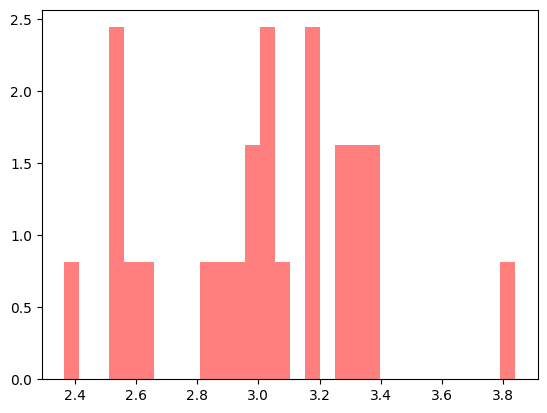

In [18]:
mu = 3.0
sigma = 0.40
# Sample Size
n = 25
# Generate a random sample of n=25 observations from the population which is normal distributed 
sample = np.random.normal(mu, sigma, n)
# Plot a histogram of the data with 30 bins between 2 and 4 
plt.hist(sample, bins=30, density=True, color='r', alpha=0.5)
# Plot a normal curve over the histogram with the same mean and standard deviation of the population 
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)


## Problem 3.26.

When sample data were used to rank states by brain cancer rates, Ellenberg (2014) noted
that the highest ranking state (South Dakota) and the nearly lowest ranking state (North
Dakota) had relatively small sample sizes. Also, when schools in North Carolina were ranked
by their average improvement in test scores, the best and the worst schools were very small
schools. Explain how these results could merely reflect how the variability of sample means and
proportions depends on the sample size.

`Your answer here`

A sample is a group of individuals or items selected from a population by a predetermined method. Sampling points, sampling units, and observations are terms used to describe the components of a sample.

Since samples are drawn from a population, there will always be some error when inferring about the population from the sample. This error is called sampling error, and it is inversely proportional to the sample size; that is, the larger the sample size, the smaller the sampling error.

For example, if we take a small sample from a population, there is a greater chance that we will select only high values or only low values. This would give us an inaccurate estimate of the population mean. However, if we increase the sample size, the estimate will move closer to the actual values. 
